In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [59]:
#df = pd.read_csv('data/preprocessed_data.csv')
df = pd.read_csv('../data/preprocessed_data.csv')

In [60]:
df.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Blue,False,0.046875,0.070312,0.552969,0.412422,0.207031,0.152188,0.000000,0.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.001991,0.289082,0.444719,0.516684,0.141343,0.000017,0.016671,0.023640,...,0,1,0,0,0,0,0,0,0,1
2,Blue,False,0.039551,0.008089,0.375617,0.431954,0.196597,0.330535,0.002093,1.318322,...,0,1,0,0,0,0,0,0,1,0
3,Red,False,0.015137,0.000000,0.450000,0.428125,0.250000,0.200000,0.147461,0.118729,...,0,0,0,1,0,0,1,0,0,0
4,Blue,False,0.759773,0.019547,0.588316,0.504957,0.248394,0.002326,0.750267,0.126350,...,0,0,0,1,0,0,1,0,0,0


### Normalizing data

In [61]:
df_num = df.select_dtypes(include=[np.float, np.int])

In [62]:
scaler = StandardScaler()

df[list(df_num.columns)] = scaler.fit_transform(df[list(df_num.columns)])

### Splitting into train, test

In [63]:
y = df['Winner']
X = df.drop(columns = 'Winner')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=43)

### Fitting baseline Random Forest

In [64]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)

In [65]:
model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=43)

In [66]:
model.oob_score_

0.6626984126984127

In [67]:
y_preds = model.predict(X_test)

In [68]:
accuracy_score(y_test, y_preds)

0.6815068493150684

In [69]:
feat_imps = {}
for i, imp in enumerate(model.feature_importances_):
    feat_imps[X_train.columns[i]] = imp

In [70]:
sorted_imp_feats = (sorted(feat_imps.items(), key = lambda x: x[1], reverse=True))
sorted_imp_feats

[('B_Reach_cms', 0.018964063864386958),
 ('R_Reach_cms', 0.016582875233499456),
 ('B_Height_cms', 0.015599839562602975),
 ('R_Height_cms', 0.014824823257820719),
 ('R_avg_opp_HEAD_landed', 0.013760979790706307),
 ('R_avg_opp_SIG_STR_pct', 0.01365878801139939),
 ('R_Weight_lbs', 0.011953776449209466),
 ('B_Weight_lbs', 0.011755870707919924),
 ('R_avg_opp_SIG_STR_landed', 0.01148566182068263),
 ('R_avg_GROUND_att', 0.011467552750156627),
 ('R_avg_opp_DISTANCE_landed', 0.011174615936118648),
 ('B_avg_DISTANCE_att', 0.010831981210551503),
 ('R_avg_opp_BODY_att', 0.010756022785585725),
 ('R_avg_GROUND_landed', 0.010639609711488893),
 ('B_avg_SIG_STR_att', 0.010392173809970312),
 ('R_avg_BODY_att', 0.01032685974470727),
 ('R_avg_opp_BODY_landed', 0.010122993401262138),
 ('B_avg_DISTANCE_landed', 0.009973965075134877),
 ('R_avg_SIG_STR_pct', 0.009901118980618942),
 ('R_avg_opp_CTRL_time(seconds)', 0.009829224483082547),
 ('R_avg_opp_DISTANCE_att', 0.009808230854390912),
 ('R_total_time_fought

In [71]:
y_train.value_counts()

Red     3746
Blue    1798
Name: Winner, dtype: int64

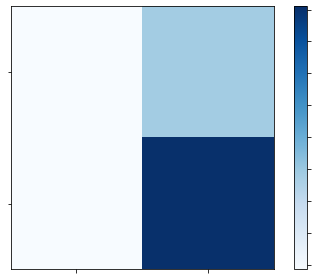

In [72]:
cm = confusion_matrix(y_test, y_preds)
classes = unique_labels(y_test, y_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

### Oversampling

In [73]:
from imblearn.over_sampling import ADASYN

In [74]:
over_sampler = ADASYN()
X_resampled, y_resampled = over_sampler.fit_sample(X_train, y_train)

In [75]:
pd.Series(y_resampled).value_counts()

Red     3746
Blue    3664
Name: Winner, dtype: int64

In [76]:
model2 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)
model2.fit(X_resampled, y_resampled)

RandomForestClassifier(oob_score=True, random_state=43)

In [77]:
model2.oob_score_

0.7711201079622132

In [78]:
y2_preds = model2.predict(X_test)

In [79]:
accuracy_score(y_test, y2_preds)

0.6643835616438356

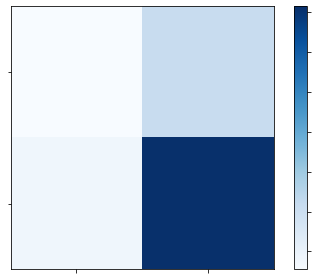

In [80]:
cm = confusion_matrix(y_test, y2_preds)
classes = unique_labels(y_test, y2_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [81]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [86]:
model3 = RandomForestClassifier(random_state=43)
rf_random = RandomizedSearchCV(estimator = model3, param_distributions = param_grid, 
                               n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x7fe0291dfd00 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/justinmilner/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/justinmilner/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 347, in __call__
    self.parallel.dispatch_next()
  File "/Users/justinmilner/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/Users/justinmilner/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/justinmilner/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, ca

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [85]:
rf_random.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
model4 = rf_random.best_estimator_

In [ ]:
y3_preds = model4.predict(X_test)
accuracy_score(y_test, y3_preds)

In [ ]:
new_param_grid = {'bootstrap': [True, False],
 'max_depth': [50, 60, 70],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [600, 800, 1000, 1200],
'criterion' :['gini']}

In [ ]:
rf = RandomForestClassifier(random_state=43)
rf_grid = GridSearchCV(estimator = rf, param_grid = new_param_grid, 
                                cv = 3, verbose=2, n_jobs = -1)
rf_grid.fit(X_resampled, y_resampled)

In [ ]:
rf_grid.best_params_

In [ ]:
model5 = rf_grid.best_estimator_

In [ ]:
y4_preds = model5.predict(X_test)
accuracy_score(y_test, y4_preds)

In [ ]:
cm = confusion_matrix(y_test, y4_preds)
classes = unique_labels(y_test, y4_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
print(classification_report(y_test, y2_preds))

In [ ]:
print(classification_report(y_test, y3_preds))

In [ ]:
print(classification_report(y_test, y4_preds))